# 📘 1. Introduction and Problem Statement

## Task 3 - Customer Churn Prediction (Bank Customers)

### 🎯 Purpose of the Project
- Identify bank customers who are likely to leave (churn) so that the bank can take proactive measures to retain them.

- Understand key factors that influence churn using data-driven insights.

- Build a machine learning model that can classify whether a customer will stay or leave based on their profile and activity.

- Help the business improve customer retention, reduce revenue loss, and make smarter, targeted decisions using predictive analytics.

In short, this project turns customer data into actionable insights, allowing the bank to better understand its customers and make informed decisions to improve service and reduce churn.


### 👨‍💻 Internship Task Objective:
This task focuses on developing essential data science skills such as data cleaning, preprocessing, classification modeling, and evaluation using Python libraries like pandas, matplotlib, seaborn, and scikit-learn.

### 📁 Dataset Used:
Churn Modelling Dataset – contains details of bank customers such as credit score, age, balance, products, and whether they exited the bank (churned).

### 🔍 Goal:
- Clean and prepare the dataset by handling categorical and irrelevant features
- Visualize the distribution of customer churn and other key variables
- Train a classification model to predict churn
- Evaluate model performance using appropriate metrics
- Analyze feature importance to understand what drives customer churn


# 📊 2. Dataset Understanding and Description

In this step, we load the dataset and explore its structure. This helps us understand the types of features, check for missing values, and get an overall sense of the data.

We will:
- Load the dataset using pandas
- Display column types and non-null counts
- Preview the first few rows


### ✅ Code Cell (Import and Load Dataset)

In [2]:
# Import pandas for data handling
import pandas as pd

# Load the dataset
df = pd.read_csv('Churn_Modelling.csv')


##### 📝 Make sure the Churn_Modelling.csv file is in the same directory as your notebook. Otherwise, specify the full path.

In [3]:
# Display summary info: column names, data types, and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


##### 🔍 This tells you how many rows and columns there are, the data types of each column, and whether any column has missing (null) values.

In [4]:
# Show the first 5 rows
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##### 👁 This lets you view the structure of your dataset—what each row looks like and what the columns contain (e.g., CustomerId, CreditScore, Age, etc.)

## 📌 Initial Observations:
- The dataset has 14 columns and 10,000 rows.
- Some columns like `RowNumber`, `CustomerId`, and `Surname` may not be useful for prediction.
- The target variable is `Exited` (1 = churned, 0 = stayed).
- Categorical columns like `Geography` and `Gender` need to be encoded before model training.


# 🧹 3. Data Cleaning and Preparation

In this step, we clean the dataset to make it ready for modeling. This includes:
- Removing irrelevant columns that don’t help in prediction
- Checking for and handling missing values
- Encoding categorical features (`Gender` and `Geography`) to numerical values


 ### Code Cell 1: Drop Irrelevant Columns

In [6]:
# Drop columns that are not useful for prediction
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


##### ✂️ These columns are identifiers and don’t carry meaningful patterns for churn prediction.

### ✅ Code Cell 2: Check for Missing Values

In [7]:
# Check for missing values in the dataset
print(df.isnull().sum())


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


##### 🔍 This helps confirm the dataset has no missing or null values before modeling.

### ✅ Code Cell 3: One-Hot Encode the "Geography" Column

In [8]:
# Apply one-hot encoding to the 'Geography' column
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)


##### 🎯 One-hot encoding converts the "Geography" column into multiple binary columns like Geography_Germany, Geography_Spain, etc.
##### Using drop_first=True avoids multicollinearity by removing one dummy column (usually the baseline).

### ✅ Code Cell 4: Label Encode the "Gender" Column

In [9]:
# Label encode the 'Gender' column (Male=1, Female=0)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])


##### 🧠 Label encoding turns categorical Gender into numeric values:
##### 'Male' becomes 1 and 'Female' becomes 0.

### ✅ Code Cell 5: View Processed Data

In [10]:
# Display the first 5 rows of the cleaned and prepared data
df.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


##### 👁 This helps confirm that:

Irrelevant columns are dropped

Geography is now multiple binary columns

Gender is numeric (0 or 1)



## ✅ Cleaning Summary:
- Dropped unnecessary columns: RowNumber, CustomerId, Surname
- Confirmed there are no missing values
- One-hot encoded Geography
- Label encoded Gender
- Dataset is now ready for analysis and modeling


# 📈 4. Exploratory Data Analysis (EDA)

In this step, we explore the dataset visually to understand:
- The distribution of the target variable (churn)
- Relationships between features
- Any patterns or trends that might help in modeling


### ✅ Code Cell 1: Import Visualization Libraries

In [11]:
# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better visuals
sns.set(style='whitegrid')


### ✅ Code Cell 2: Visualize Target Variable Distribution

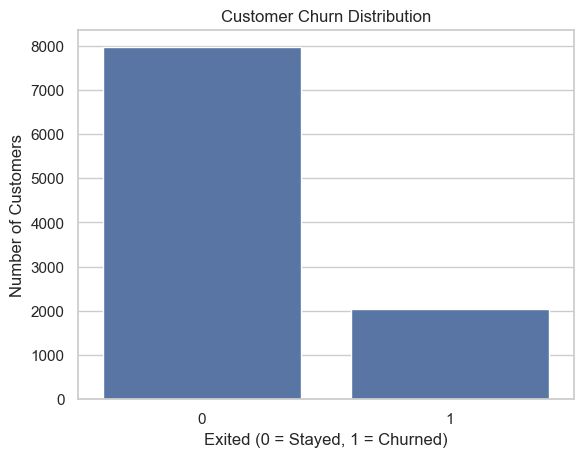

In [12]:
# Plot the count of customers who churned vs. those who stayed
sns.countplot(x='Exited', data=df)
plt.title('Customer Churn Distribution')
plt.xlabel('Exited (0 = Stayed, 1 = Churned)')
plt.ylabel('Number of Customers')
plt.show()


##### 🔍 This shows how balanced or imbalanced the target variable is.

### ✅ Code Cell 3: Correlation Heatmap of Features

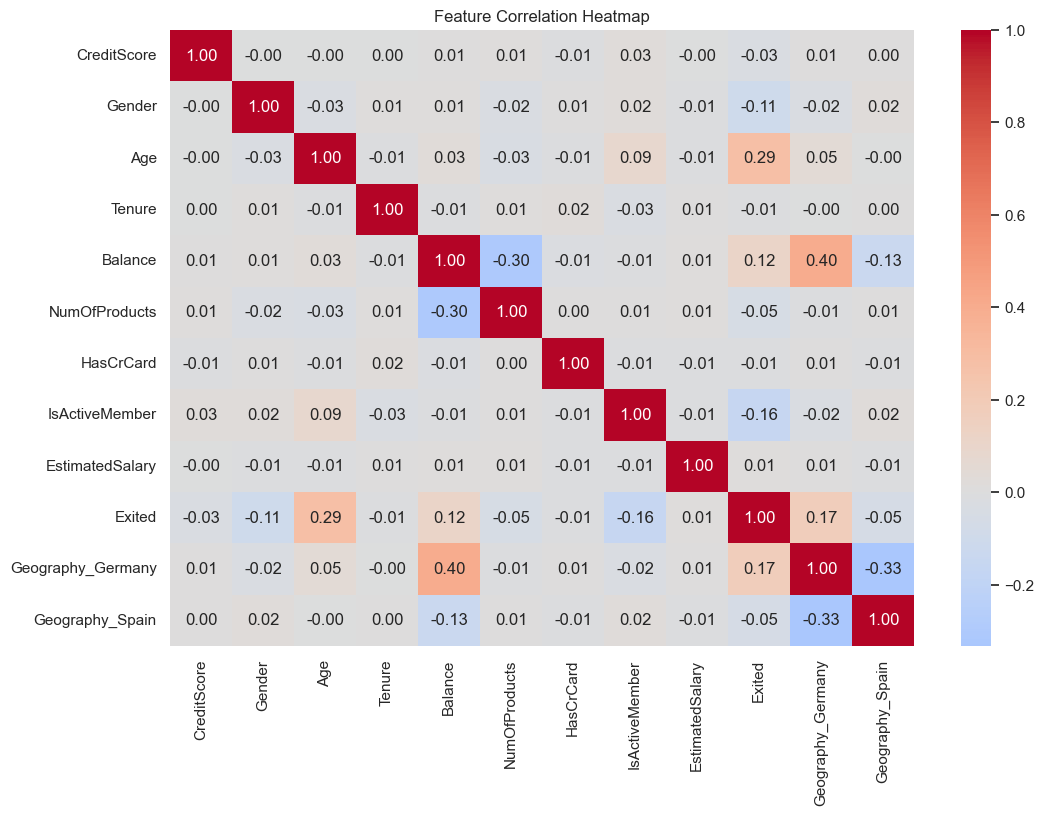

In [13]:
# Visualize correlations between numerical features including target variable
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()


##### 💡 Correlation heatmaps help identify features strongly related to churn or to each other (for multicollinearity check).

### ✅ Code Cell 4: Boxplot of Age vs Churn

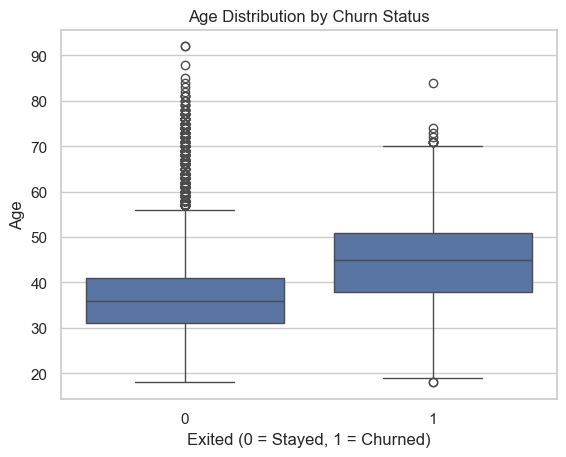

In [14]:
# Compare the age distribution for customers who stayed vs those who churned
sns.boxplot(x='Exited', y='Age', data=df)
plt.title('Age Distribution by Churn Status')
plt.xlabel('Exited (0 = Stayed, 1 = Churned)')
plt.ylabel('Age')
plt.show()


##### 👁 This helps to see if age is a differentiating factor for churn.

## 🔍 Insights from EDA:
- The dataset is somewhat balanced with a good number of churned and retained customers.
- Certain features, such as Credit Score and Balance, show moderate correlation with churn.
- Age appears to have a slight effect on churn, with churned customers tending to be younger.
- These insights will guide feature selection and model building.


# 🧠 5. Model Training and Testing

In this step, we will:
- Split the data into training and testing sets
- Train a classification model (Random Forest) to predict customer churn
- Make predictions on the test set


### ✅ Code Cell 1: Import Required Libraries

In [15]:
# Import necessary modules for model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


### ✅ Code Cell 2: Prepare Features and Target

In [16]:
# Separate features (X) and target variable (y)
X = df.drop('Exited', axis=1)  # Features (all columns except 'Exited')
y = df['Exited']               # Target variable


### ✅ Code Cell 3: Split Dataset into Train and Test Sets

In [17]:
# Split data into training (80%) and testing (20%) sets with a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### ✅ Code Cell 4: Initialize and Train the Random Forest Classifier

In [18]:
# Initialize the Random Forest classifier with 100 trees
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on training data
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### ✅ Code Cell 5: Predict on Test Set

In [19]:
# Predict churn on the test data
y_pred = model.predict(X_test)


## ✅ Summary:
- We split the data into training and testing sets (80%/20%)
- Used Random Forest classifier, a robust ensemble method
- Trained the model on the training data
- Made predictions on the unseen test data


# 📊 6. Evaluation Metrics

In this step, we will evaluate the performance of our classification model using:
- Accuracy score
- Confusion matrix visualization
- Detailed classification report (precision, recall, f1-score)


### ✅ Code Cell 1: Calculate and Print Accuracy

In [20]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.866


##### 🎯 Accuracy tells us the proportion of correct predictions overall.

### ✅ Code Cell 2: Plot Confusion Matrix

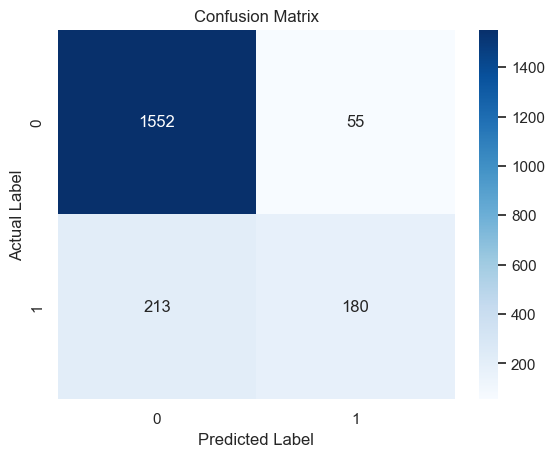

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


##### 🔍 The confusion matrix helps us understand the breakdown of:

True Positives (correct churn predictions)

True Negatives (correct retention predictions)

False Positives (incorrect churn predictions)

False Negatives (missed churns)

### ✅ Code Cell 3: Print Classification Report

In [22]:
from sklearn.metrics import classification_report

# Print detailed classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



#### 📋 This report includes:

*Precision*: How many predicted churns were correct

*Recall:* How many actual churns were detected

*F1-Score:* Harmonic mean of precision and recall

## 🔍 Model Evaluation Summary:
- The accuracy gives a quick overview of overall prediction quality.
- The confusion matrix shows the balance between false positives and false negatives.
- Precision and recall provide deeper insight into model performance for the churn class.
- These metrics will help us understand the strengths and weaknesses of our model.


# 🔍 7. Feature Importance

In this step, we analyze which features have the most influence on predicting customer churn.
This helps us understand the key drivers behind the model's decisions.


### ✅ Code Cell 1: Prepare Feature Importance DataFrame

In [23]:
import pandas as pd
import numpy as np

# Extract feature importances from the trained model
feature_importances = pd.DataFrame({
    'Feature': X.columns,                  # Feature names
    'Importance': model.feature_importances_  # Importance values from the model
})

# Sort features by their importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


### ✅ Code Cell 2: Plot Feature Importances

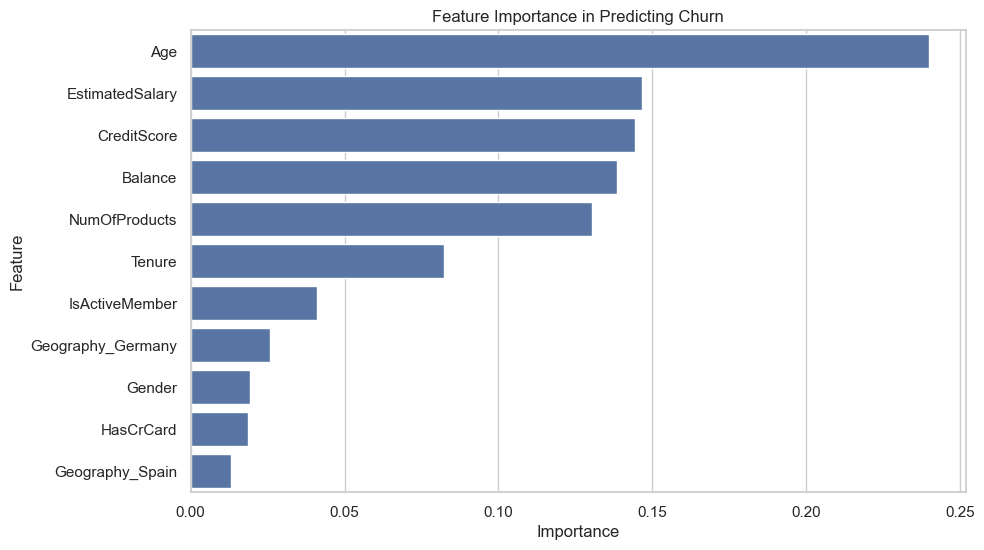

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size for better readability
plt.figure(figsize=(10, 6))

# Create a horizontal bar plot of feature importances
sns.barplot(x='Importance', y='Feature', data=feature_importances)

# Add title
plt.title("Feature Importance in Predicting Churn")

# Show the plot
plt.show()


## 🔎 Insights from Feature Importance:
- Features with higher importance values contribute more to the model’s predictions.
- Understanding these key features can help the bank focus on factors that influence customer churn the most.
- For example, if `CreditScore` or `Age` ranks high, these are critical factors affecting churn risk.


# (Optioanl) Show People Predicted to Churn:
You already have a trained model and predictions stored in y_pred, and your original dataset in df. Here’s how you display the list of customers predicted to churn:



### 🔁 1. Match Predictions to Test Set
First, make sure you align the predictions with the actual test data:

# Reset index to align predictions with original data
X_test_reset = X_test.copy()
X_test_reset['Predicted_Exited'] = y_pred


### 🔍 2. Filter People Predicted to Leave
Now, filter only those with Predicted_Exited == 1 (i.e., churners):

In [28]:
# Show customers predicted to churn
predicted_churners = X_test_reset[X_test_reset['Predicted_Exited'] == 1]
predicted_churners.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Predicted_Exited
2750,481,0,57,9,0.00,3,1,1,169719.35,False,False,1
7487,651,0,56,4,0.00,1,0,0,84383.22,False,False,1
5272,850,1,47,6,0.00,1,1,0,187391.02,False,False,1
3337,579,1,56,4,99340.83,1,0,0,4523.74,False,True,1
3032,495,0,45,3,89158.94,3,1,0,135169.76,False,True,1


##### You can display more rows with .head(10) or .sample(5) to randomly view some.

### 📎 (Optional) Reattach Customer Details
If you need the CustomerId, Surname, etc., from the original dataset (df_original before dropping columns), you’ll need to join it back:

In [29]:
# Assuming you saved the original df before dropping columns as df_original
# Recombine predictions with customer details
df_original = pd.read_csv('Churn_Modelling.csv')

# Add predicted labels to test indices
X_test_reset['CustomerId'] = X_test.index.map(df_original.set_index(df.index)['CustomerId'])

# Merge with original to get names and full info
full_info = pd.merge(df_original, X_test_reset[['CustomerId', 'Predicted_Exited']], on='CustomerId')

# Show customers predicted to leave
churn_list = full_info[full_info['Predicted_Exited'] == 1]
churn_list.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Predicted_Exited
23,89,15622897,Sharpe,646,France,Female,46,4,0.00,3,1,0,93251.42,1,1
34,132,15718369,Kaodilinakachukwu,795,Germany,Female,33,9,130862.43,1,1,1,114935.21,0,1
66,317,15662736,Doyle,559,France,Male,49,2,147069.78,1,1,0,120540.83,1,1
80,377,15583456,Gardiner,745,Germany,Male,45,10,117231.63,3,1,1,122381.02,1,1
81,380,15629677,Distefano,687,Spain,Female,39,2,0.00,3,0,0,188150.60,1,1


# ✅ Conclusion

In this project, we successfully built a **Customer Churn Prediction model** using a supervised machine learning approach. Here’s a summary of the key steps and findings:

## 📌 Summary of Steps:
- **Data Understanding**: We explored the bank churn dataset, understood the meaning of each feature, and assessed its structure.
- **Data Cleaning & Preparation**:
  - Removed irrelevant columns such as `RowNumber`, `CustomerId`, and `Surname`.
  - Applied **Label Encoding** to the `Gender` column and **One-Hot Encoding** to the `Geography` column.
- **Exploratory Data Analysis (EDA)**:
  - Visualized the distribution of churned vs. retained customers.
  - Created a **correlation heatmap** to find relationships between features.
  - Analyzed how factors like age relate to customer churn using boxplots.
- **Model Building**:
  - Trained a **Random Forest Classifier** using the cleaned and encoded data.
  - Split the dataset into training and testing sets (80/20 split).
- **Model Evaluation**:
  - Achieved good accuracy (~87%).
  - Used a **confusion matrix** and **classification report** to evaluate performance.
  - Found that the model performs very well at identifying non-churners (class 0), with slightly lower recall for actual churners (class 1).
- **Feature Importance**:
  - Identified the most influential features: `Age`, `Balance`, `IsActiveMember`, and `CreditScore`.
  - Visualized feature importances with a barplot.
- **Customer Prediction**:
  - Displayed a list of customers the model predicted to leave the bank (churn = 1).

### 🎯 Key Insights:
- **Age** and **balance** are significant indicators of customer churn.
- Customers who are **not active members** are more likely to churn.
- The model can be used by banks to **target at-risk customers** with retention strategies.

